<a href="https://colab.research.google.com/github/miftahudinfaiz/BDDM/blob/main/BD%26DM_week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diberikan dataset sebagai berikut:
https://drive.google.com/file/d/1W_-TeeNbSMCHxGhz6TJfEHFHgnyMiBQk/view?usp=share_link



Tulis Identitas anda:

*   Nim: 20.11.3675
*   Nama: Miftahudin Faiz
*   Kelas: 20-S1-IF-07


1. Lakukan klasifikasi dengan ketentuan sebagai berikut:


*   a. gunakan algoritma naive bayes
*   b. gunakan algoritma random forest





2. Lakukan analisa performa naive bayes dan random forest tersebut

3. Gunakan K-FOLD VALIDATION DENGAN nilai K=10, untuk mengukur performa 2 algoritma tersebut

4. Lakukan analisa, algoritma mana yang paling baik performanya menurut anda, berikan penjelasannya

##1. Import Library

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

##2. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/miftahudinfaiz/BDDM/main/Dataset%20files/IRIS.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##3. Encoding

In [5]:
# Checking whether there are any uniqe data in "species" column
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Mapping "species" column
num_species= {
    "Iris-setosa":0, 
    "Iris-versicolor":1,
    "Iris-virginica":2
}

In [7]:
# Encode the mapped column into dataframe
df_encoded = df.copy()
df_encoded["species"] = df_encoded["species"].map(num_species)

In [8]:
# Showing the mapped dataframe
df_encoded

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


###4. Preparing Data for Classification

In [9]:
# Looking for the data correlation
corr = df_encoded.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [10]:
# Feature selection with correlation target greater than 0.5
corr_target = abs(corr["species"])
relevant_features = corr_target[corr_target>0.5]
relevant_features

sepal_length    0.782561
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [11]:
# Drop unused columns
df_encoded.drop(["sepal_width"], axis=1, inplace=True)
df_encoded

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


In [12]:
# Selecting specific rows
X = df_encoded.iloc[:,[0,1,2]].values
y = df_encoded.iloc[:,-1].values

In [13]:
# Printing X and y values
print(f"X: \n {X[:10]}")
print(f"y: \n {y[:10]}")

X: 
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]]
y: 
 [0 0 0 0 0 0 0 0 0 0]


In [14]:
# Splitting data using test_size=0.3 and random_state=21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [15]:
# Printing the splitted data
print("X_train shape\t: ",X_train.shape)
print("X_test shape\t: ",X_test.shape)
print("y_train shape\t: ",y_train.shape)
print("y_test shape\t: ",y_test.shape)

X_train shape	:  (105, 3)
X_test shape	:  (45, 3)
y_train shape	:  (105,)
y_test shape	:  (45,)


###5. Naive Bayes Classification

In [16]:
# Gaussian Naive Bayes classification model
classifier_NB = GaussianNB()
classifier_NB.fit(X_train,y_train)

GaussianNB()

In [17]:
# Prediction
pred_NB = classifier_NB.predict(X_test)

In [18]:
# Printing the results
print("Index \t Species");
for i,y in enumerate(pred_NB[:10]):
  print(f"{i} \t {y}")

Index 	 Species
0 	 1
1 	 0
2 	 0
3 	 0
4 	 1
5 	 1
6 	 0
7 	 2
8 	 0
9 	 0


In [19]:
# Probablities
classifier_NB.predict_proba(X_test[:15])

array([[2.57426973e-073, 9.99972397e-001, 2.76034248e-005],
       [1.00000000e+000, 2.99343908e-011, 1.50341965e-019],
       [1.00000000e+000, 1.49477790e-018, 2.36041102e-026],
       [1.00000000e+000, 8.83536184e-015, 8.95185534e-024],
       [8.82643177e-082, 9.99935992e-001, 6.40079105e-005],
       [2.61069801e-103, 9.91754766e-001, 8.24523437e-003],
       [1.00000000e+000, 2.17532503e-016, 1.75130489e-023],
       [2.98072864e-160, 3.71812923e-003, 9.96281871e-001],
       [1.00000000e+000, 2.95844252e-014, 3.61641758e-023],
       [1.00000000e+000, 1.00544900e-016, 3.98072710e-025],
       [9.73265028e-053, 9.99998469e-001, 1.53143092e-006],
       [2.69225193e-081, 9.99942681e-001, 5.73191957e-005],
       [9.02116780e-255, 1.34931496e-010, 1.00000000e+000],
       [1.74222463e-316, 8.91220566e-013, 1.00000000e+000],
       [1.00000000e+000, 4.15713904e-011, 2.96973584e-020]])

###6. Random Forest Classification

In [20]:
# Create binary classifier with RFC
classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
# Prediction
pred_RFC = classifier_RFC.predict(X_test)

In [22]:
# Printing the results
print("Index \t Species");
for i,y in enumerate(pred_RFC[:10]):
  print(f"{i} \t {y}")

Index 	 Species
0 	 1
1 	 0
2 	 0
3 	 0
4 	 1
5 	 1
6 	 0
7 	 2
8 	 0
9 	 0


###7. Naive Bayes Classification and Random Forest Classification performance comparisons

In [23]:
# Showing the classification report for Naive Bayes Classification
print(f"Classification Report for Naive Bayes Classification\n{classification_report(y_test, pred_NB, zero_division=0)}")

Classification Report for Naive Bayes Classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [24]:
# Showing classification report for Random Forest Classification
print(f"Classification Report for Random Forest Classification\n{classification_report(y_test, pred_RFC, zero_division=0)}")

Classification Report for Random Forest Classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


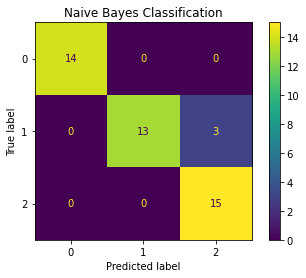

In [25]:
# Showing the confussion matrix of Naive Bayes
plot_confusion_matrix(classifier_NB, X_test, y_test)
plt.title("Naive Bayes Classification")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


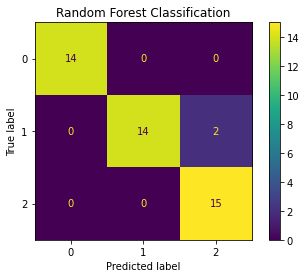

In [26]:
# Showing the confussion matrix of RFC
plot_confusion_matrix(classifier_RFC, X_test, y_test)
plt.title("Random Forest Classification")
plt.show()

###8. K-Fold Cross Validation (k=10)

In [29]:
# K-Fold Cross Validation for Naive Bayes
score_NB = cross_validate(classifier_NB, X_test, y_test, cv=10)
df_score_NB = pd.DataFrame(score_NB)
print(f"K-Fold Cross Validation for Naive Bayes:\n\n{df_score_NB}\n\nAverage :\n{df_score_NB.mean()}")

K-Fold Cross Validation for Naive Bayes:

   fit_time  score_time  test_score
0  0.001994    0.000653        1.00
1  0.004896    0.000741        1.00
2  0.001474    0.000870        0.80
3  0.001025    0.000417        1.00
4  0.001011    0.000447        1.00
5  0.001092    0.000457        1.00
6  0.000698    0.000351        0.75
7  0.000710    0.000328        1.00
8  0.000700    0.000323        1.00
9  0.000642    0.000340        1.00

Average :
fit_time      0.001424
score_time    0.000493
test_score    0.955000
dtype: float64


In [30]:
#K-Fold Cross Validation for Random Forest Classification
score_NB = cross_validate(classifier_RFC, X_test, y_test, cv=10)
df_score_NB = pd.DataFrame(score_NB)
print(f"K-Fold Cross Validation for Random Forest Classification:\n\n{df_score_NB}\n\nAverage :\n{df_score_NB.mean()}")

K-Fold Cross Validation for Random Forest Classification:

   fit_time  score_time  test_score
0  0.204759    0.020826        1.00
1  0.175911    0.009297        0.80
2  0.111738    0.008893        0.80
3  0.114872    0.008708        1.00
4  0.121890    0.013493        1.00
5  0.113017    0.008694        1.00
6  0.124317    0.008907        0.75
7  0.112731    0.008801        1.00
8  0.120898    0.008704        1.00
9  0.122744    0.010007        1.00

Average :
fit_time      0.132288
score_time    0.010633
test_score    0.935000
dtype: float64


#KESIMPULAN

##Dapat diambil beberapa point dari percobaan K-Fold di atas, yaitu:
1. Value Fit Time Naive Bayes yang dihasilkan jauh lebih kecil daripada Random Forest Classification, berarti bahwa pada percobaan ini, Naive Bayes memiliki time complexity yang lebih singkat/cepat.
2. Value Score Time Naive Bayes yang dihasilkan jauh lebih kecil daripada Random Forest Classification, berarti bahwa pada percobaan ini, Naive Bayes memiliki time complexity yang lebih singkat/cepat.
3. Value test Score Naive Bayes yang dihasilkan jauh lebih besar daripada Random Forest Classfication, berarti bahwa pada percobaan ini, Naive Bayes lebih akurat.

Kesimpulan dari analisa percobaan:
Jika diambil dari hasil K-Fold, Naive Bayes memiliki performa yang lebih unggul dibanding Random Forest. Setelah membaca beberapa referensi. Percobaan di atas belum dapat dijadikan sebagai justifikasi perbandingan mana metode yang lebih unggul. Dan dari referensi tersebut, performa dua metode tersebut dapat berbeda jika data yang dipakai memiliki kondisi yang berbeda pula.
